In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import requests

Fetch stations.

In [6]:
payload = {'city_slug': 'toulouse'}
stations = requests.get('http://api.openbikes.co/stations', params=payload).json()

Add the stations to a graph.

In [10]:
G = nx.Graph()

for station in stations:
    G.add_node(station['name'], pos=(station['latitude'], station['longitude']))

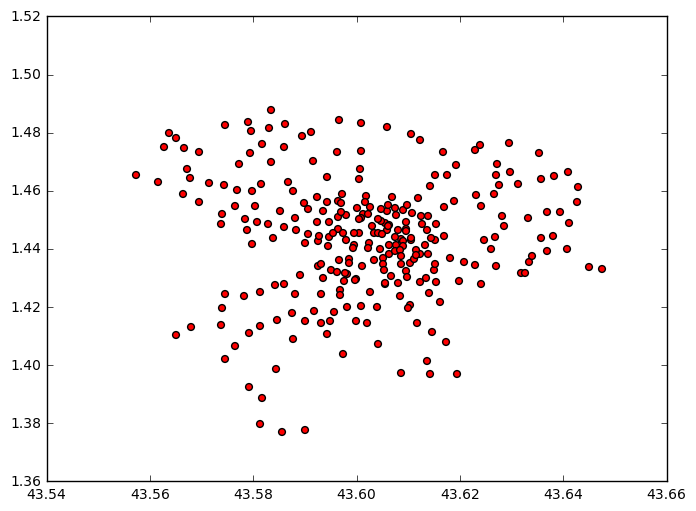

In [14]:
positions = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, positions, node_size=24, with_labels=False)

Connect the closest pairs of stations.

In [16]:
def euclidean_distance(a, b):
    dx = a['latitude'] - b['latitude']
    dy = a['longitude'] - b['longitude']
    return (dx ** 2 + dy ** 2) ** 1/2

for a in stations:
    minimum = 10e9 # Very big value
    neighbour = None
    for b in stations:
        # No need to compare a station to itself
        if a['name'] != b['name']:
            distance = euclidean_distance(a, b)
            if distance < minimum:
                minimum = distance
                neighbour = b
    G.add_edge(a['name'], neighbour['name'])

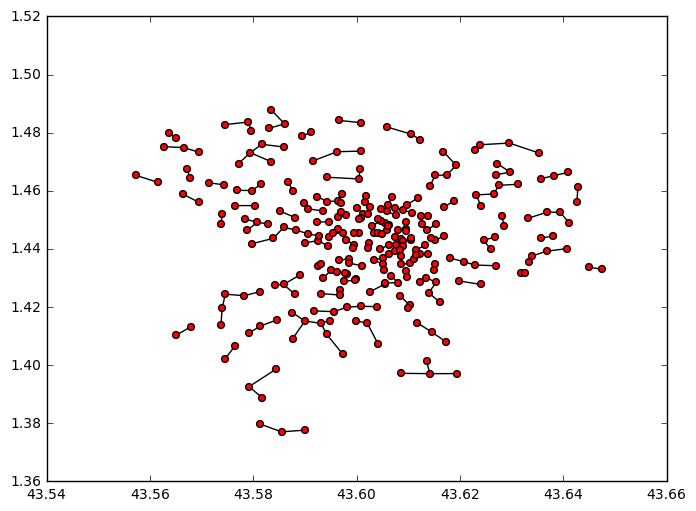

In [17]:
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, positions, node_size=24, with_labels=False)

Keep connecting the connected components until the graph is connected.

In [21]:
def euclidean_distance(a, b):
    dx = a['pos'][0] - b['pos'][0]
    dy = a['pos'][1] - b['pos'][1]
    return (dx ** 2 + dy ** 2) ** 1/2

while not nx.is_connected(G):
    for i, A in enumerate(nx.connected_components(G)):
        minimum = 10e9
        pair = None
        for j, B in enumerate(nx.connected_components(G)):
            if i != j:
                for a in A:
                    for b in B:
                        distance = euclidean_distance(G.node[a], G.node[b])
                        if distance < minimum:
                            minimum = distance
                            pair = [a, b]
        G.add_edge(pair[0], pair[1])

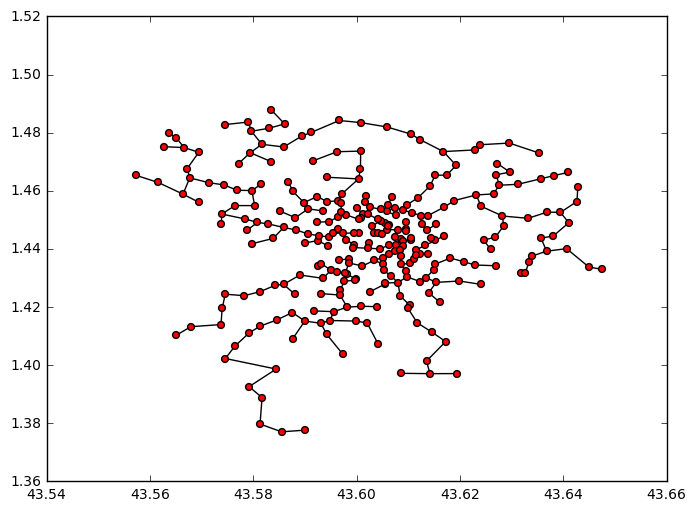

In [22]:
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, positions, node_size=24, with_labels=False)